In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data File - https://drive.google.com/file/d/1XSUdROBYA7YXCaZCYWOeQmJYOOA_kuV6/view?usp=drive_link

In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

In [ ]:
# Data Import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/employee_data.csv')
# Data sample
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Number of rows and columns in the data
rows, cols = data.shape
print(f'The data has {rows} rows and {cols} columns.')

The data has 1470 rows and 35 columns.


In [ ]:
# Check the data type of the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Number of numerical and categorical features
num, obj = 0, 0
for feature in data.columns:
    if data[feature].dtype == 'O':
        obj += 1
    else:
        num += 1
print('NUMBER OF CATEGORICAL AND NUMERICAL FEATURES:')
print(f'The data has {obj} categorical and {num} numerical features.')

# Percentage of missing values
print('\nPERCENTAGE OF MISSING VALUES:')
total = 0
for feature in data.columns:
    total += len(data[feature])

missing = round(data.isnull().mean()*100,2)
print('There is no missing value in dataset.' if total == data.size else missing)

NUMBER OF CATEGORICAL AND NUMERICAL FEATURES:
The data has 9 categorical and 26 numerical features.

PERCENTAGE OF MISSING VALUES:
There is no missing value in dataset.


In [ ]:
# Checking data duplicates
rows, cols = data[data.duplicated()].shape
print('There are no duplicates.' if rows == 0 else f'There are {rows} duplicates in the data.')

# if you find any duplicates then treat it
    # data.drop_duplicates(inplace=True)

There are no duplicates.


In [ ]:
# Understanding the categorical features
for feature in data.columns:
    if data[feature].dtype == 'O':
        if len(data[feature].unique()) == 1:
            print(f'** {feature} has {len(data[feature].unique())} unique values **')
        else:
            print(f'{feature} has {len(data[feature].unique())} unique values')

Attrition has 2 unique values
BusinessTravel has 3 unique values
Department has 3 unique values
EducationField has 6 unique values
Gender has 2 unique values
JobRole has 9 unique values
MaritalStatus has 3 unique values
** Over18 has 1 unique values **
OverTime has 2 unique values


In [ ]:
# Feature "Over18" is populated with one value, it wont contribute to analysis
del data['Over18']

In [ ]:
# Understanding the numerical features
for feature in data.columns:
    if data[feature].dtype != 'O':
        if len(data[feature].unique()) == 1:
            print(f'** {feature} has {len(data[feature].unique())} unique values **')
        else:
            print(f'{feature} has {len(data[feature].unique())} unique values')

Age has 43 unique values
DailyRate has 886 unique values
DistanceFromHome has 29 unique values
Education has 5 unique values
** EmployeeCount has 1 unique values **
EmployeeNumber has 1470 unique values
EnvironmentSatisfaction has 4 unique values
HourlyRate has 71 unique values
JobInvolvement has 4 unique values
JobLevel has 5 unique values
JobSatisfaction has 4 unique values
MonthlyIncome has 1349 unique values
MonthlyRate has 1427 unique values
NumCompaniesWorked has 10 unique values
PercentSalaryHike has 15 unique values
PerformanceRating has 2 unique values
RelationshipSatisfaction has 4 unique values
** StandardHours has 1 unique values **
StockOptionLevel has 4 unique values
TotalWorkingYears has 40 unique values
TrainingTimesLastYear has 7 unique values
WorkLifeBalance has 4 unique values
YearsAtCompany has 37 unique values
YearsInCurrentRole has 19 unique values
YearsSinceLastPromotion has 16 unique values
YearsWithCurrManager has 18 unique values


In [ ]:
# Feature "StandardHours" and "EmployeeCount" has only one unique value
# Feature "EmployeeNumber" look like a ID column

for cols in ['StandardHours', 'EmployeeNumber', 'EmployeeCount']:
    del data[cols]

In [ ]:
# Data dimension after priliminary cleaning
rows, cols = data.shape
print(f'The data has {rows} rows and {cols} columns after cleaning.')

The data has 1470 rows and 31 columns after cleaning.


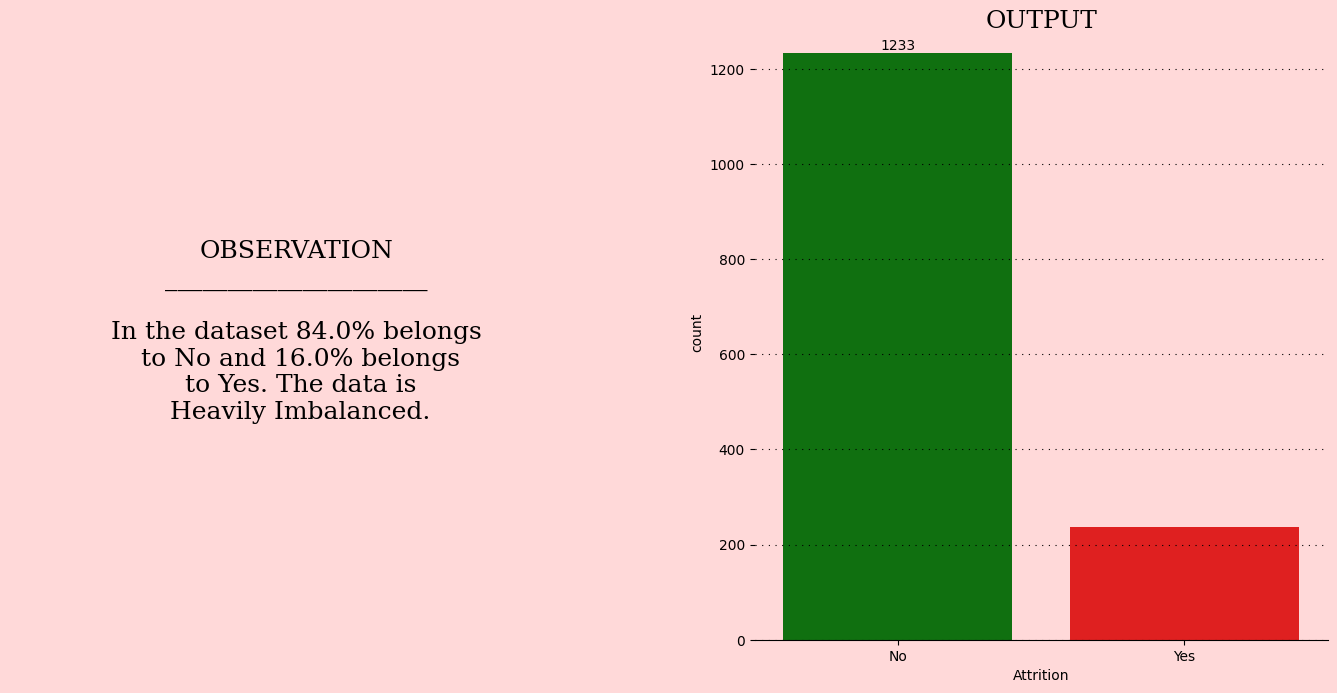

In [ ]:
# Analysing the target column

# Creating the plot structure
fig = plt.figure(figsize=(17, 8))
spec = fig.add_gridspec(1, 2)
spec.update(wspace=0.3, hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# adding color preference
bg_color = '#ffd9d9'
for section in [fig, sec_1, sec_2]:
    section.set_facecolor(bg_color)

# Plotting the graph
ax_val = sns.countplot(x=data['Attrition'],
                       order=data['Attrition'].value_counts().index,
                       palette=['green', 'red'])
ax_val.bar_label(ax_val.containers[0])
sec_2.grid(color='#000000', axis='y', ls=':', dashes=(1,5))
sec_2.text(0.5, 1300, 'OUTPUT', ha='center', va='center', size=18, family='serif')

# Narrating the observation
max, min = round(data['Attrition'].value_counts(normalize=True), 2)*100
sec_1.text(0.5, 0.5, f'OBSERVATION\n_____________________\n\nIn the dataset {max}% belongs\n to No \
and {min}% belongs\n to Yes. The data is\n Heavily Imbalanced.', ha='center', va='center', size=18, family='serif')

# Removing the spines and axes
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for position in ['left', 'right', 'top', 'bottom']:
    for section in [sec_1, sec_2]:
        if position == 'bottom' and section == sec_2:
            section.spines[position].set_visible(True)
        else:
            section.spines[position].set_visible(False)

plt.show()

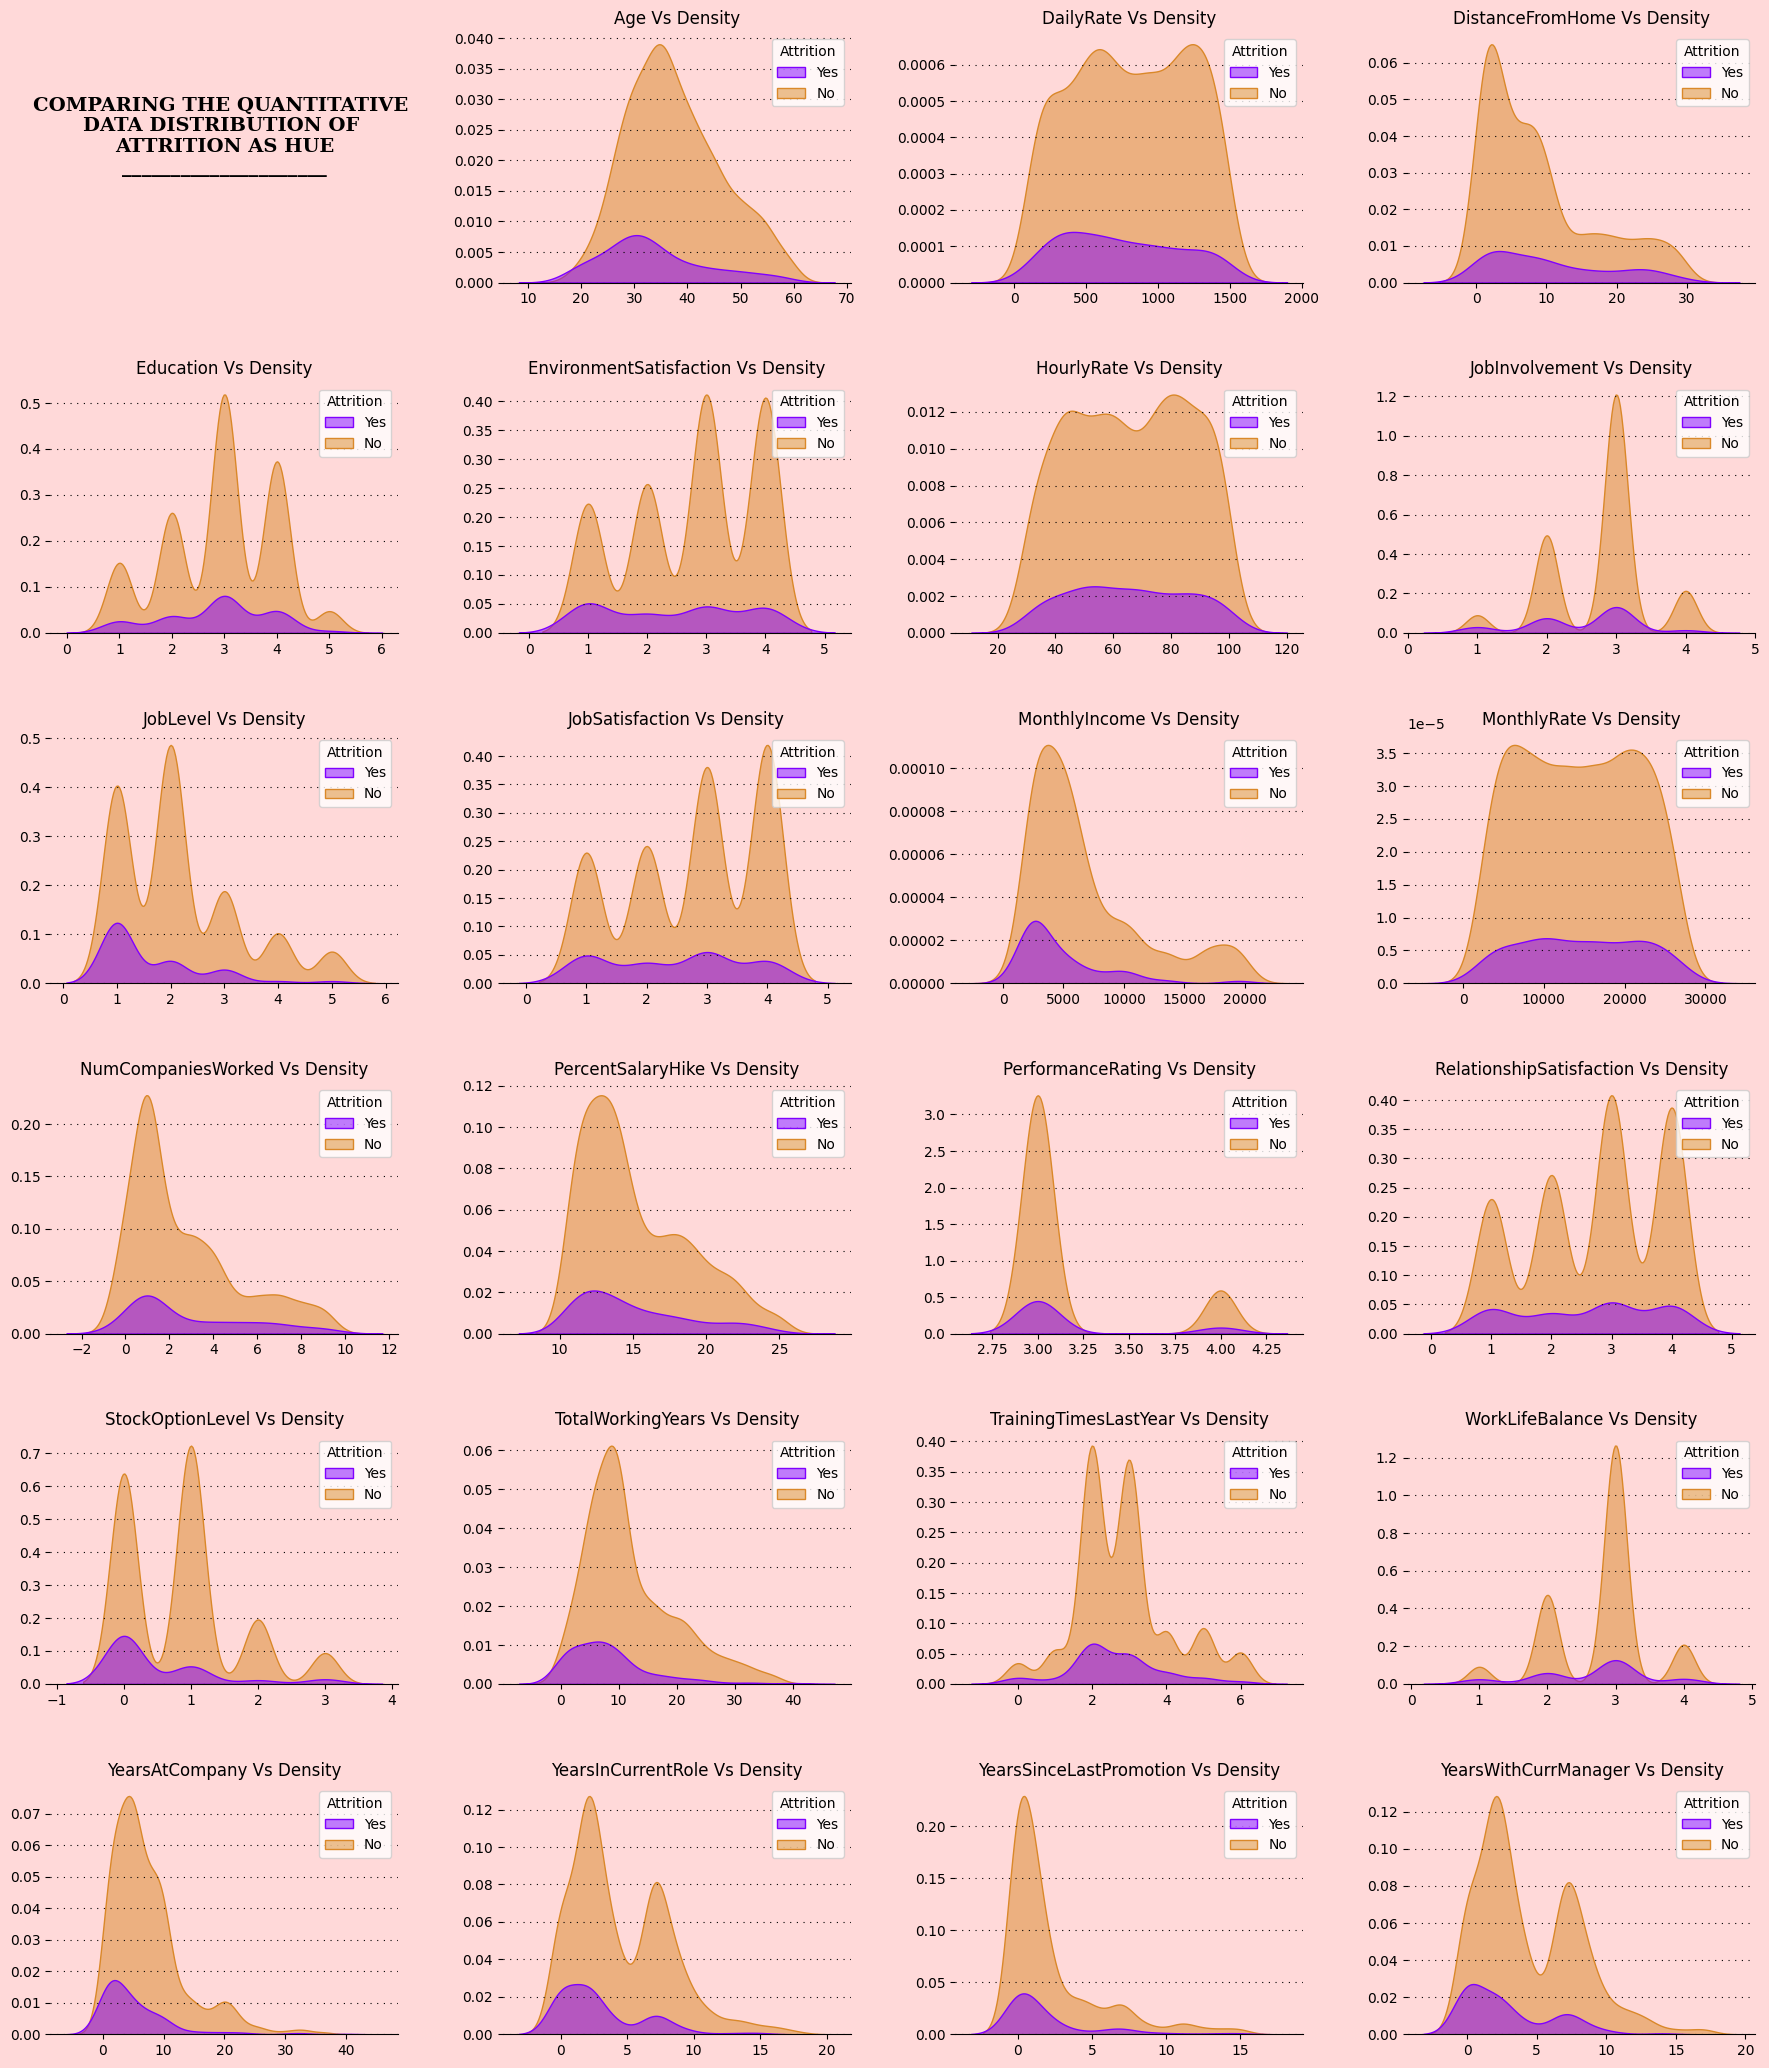

In [ ]:
# Comparing the proportion of distribution of targets across numerical classes

# Creating the plot structure
fig = plt.figure(figsize=(22, 26))
spec = fig.add_gridspec(6, 4)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

# adding color preference
bg_color = '#ffd9d9'
for section in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
                  sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]:
    section.set_facecolor(bg_color)

# plotting the graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
        sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
        sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]

cnt = 0
for feature in data.columns:
    if data[feature].dtype != 'O':
        sns.kdeplot(data, x=feature, hue='Attrition',
                    fill=True, palette=["#8000ff","#da8829"],
                    alpha=0.5, ax=sec[cnt])
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature+' Vs Density')
        sec[cnt].grid(color='#000000', ls=':', axis='y', dashes=(1,5))

        for position in ['left', 'right', 'top']:
            sec[cnt].spines[position].set_visible(False)

        cnt += 1


# Creating plot structure title
sec_01.text(0.5,0.5,'COMPARING THE QUANTITATIVE \nDATA DISTRIBUTION OF \nATTRITION AS HUE\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)


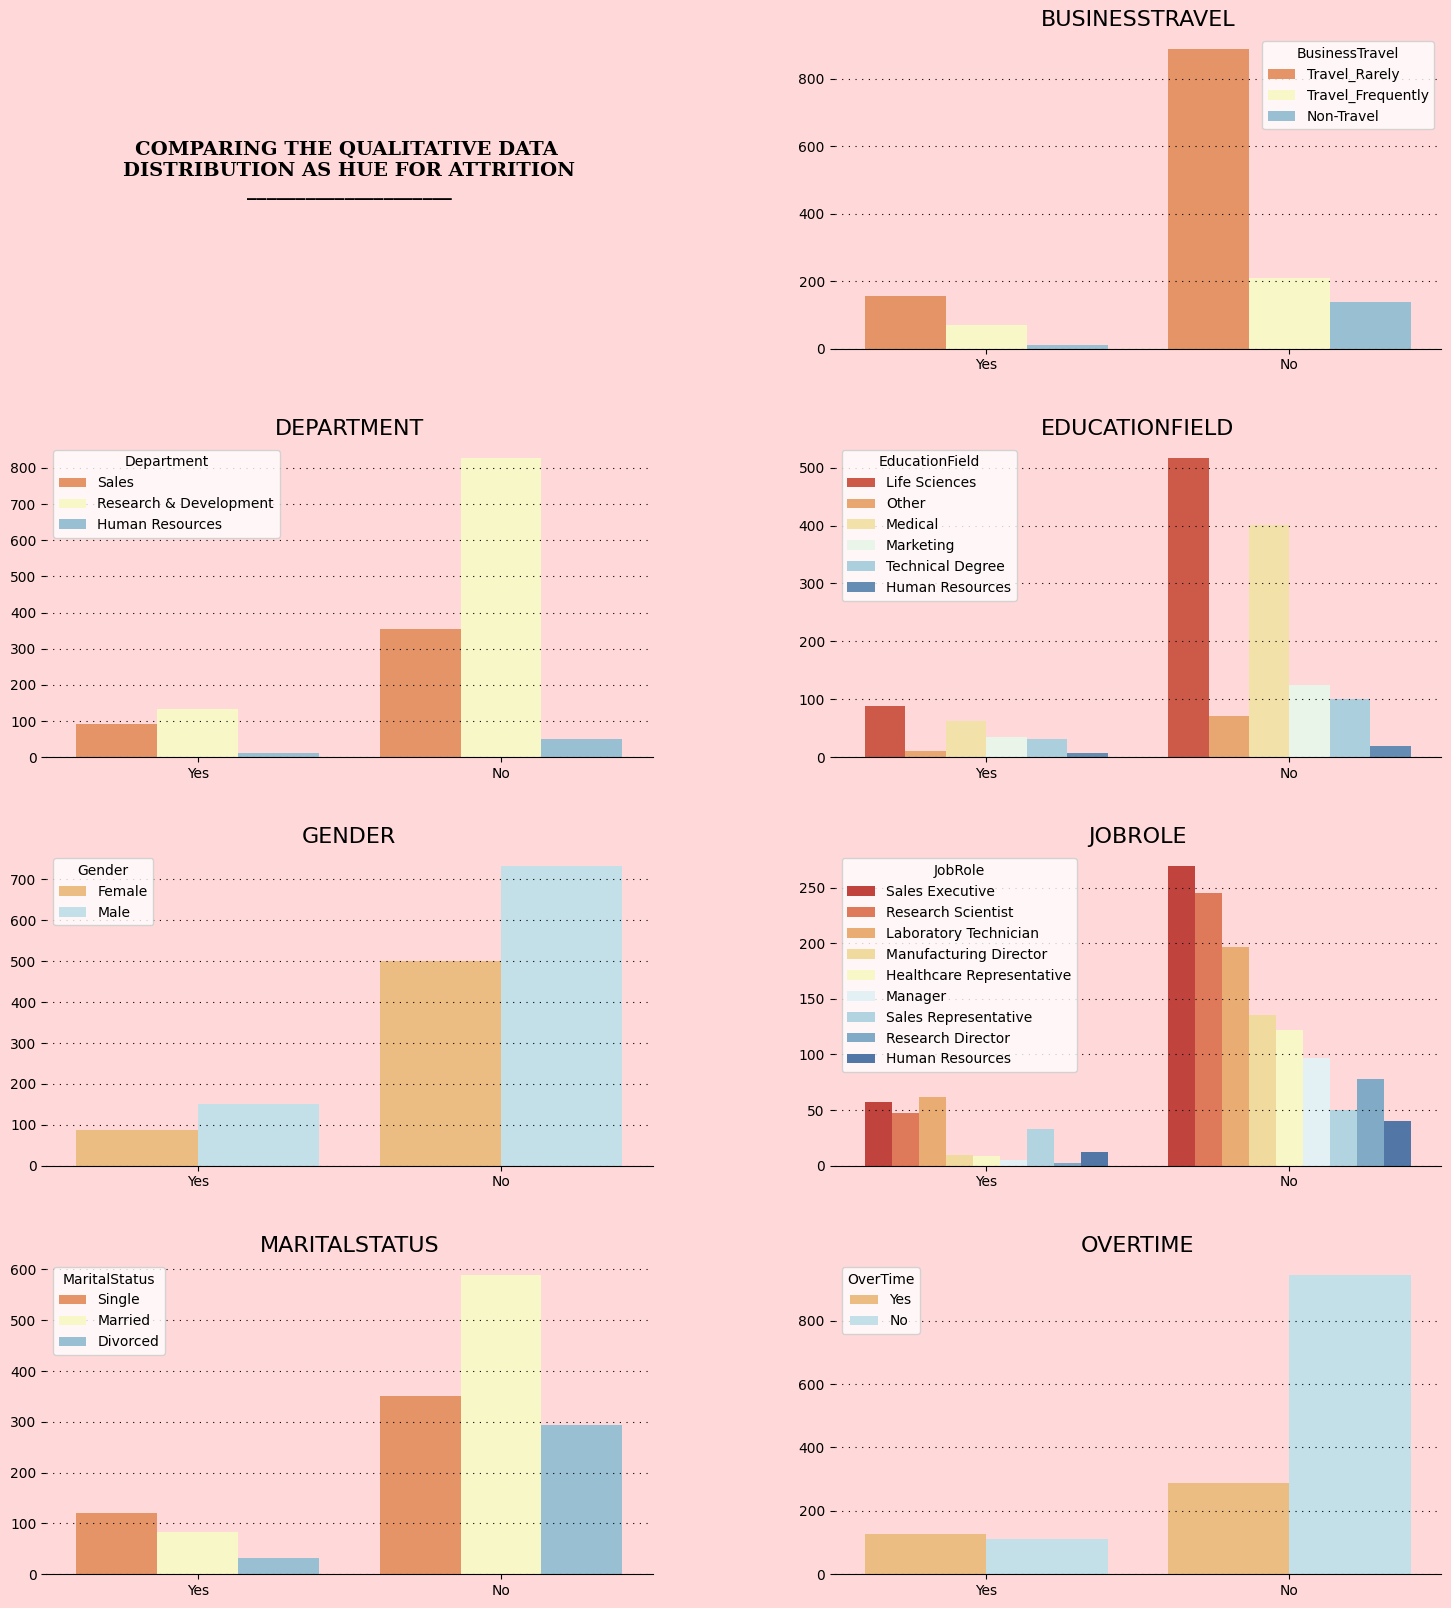

In [ ]:
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[1,0])
sec_4 = plt.subplot(spec[1,1])
sec_5 = plt.subplot(spec[2,0])
sec_6 = plt.subplot(spec[2,1])
sec_7 = plt.subplot(spec[3,0])
sec_8 = plt.subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)

# Plotting graph
sec = [sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]
cnt = 0
for feature in data:
    if data[feature].dtype=='O' and feature != 'Attrition':
        sns.countplot(data, x='Attrition',hue=feature, ax=sec[cnt], palette='RdYlBu')
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature.upper(), fontsize=16)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

        for position in ['top', 'right', 'left']:
            sec[cnt].spines[position].set_visible(False)
        cnt+=1

# Creating plot structure title
sec_1.text(0.5,0.5,'COMPARING THE QUALITATIVE DATA \nDISTRIBUTION AS HUE FOR ATTRITION\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_1.spines[location].set_visible(False)

In [ ]:
# OBSERVATION ON QUALITATIVE AND QUANTITATIVE DATA DISTRIBUTION UPON ATTRITION:


#   1. For the quantitative variables, the distribution of attition 'yes' folows the same pattern of distribution
#      for attrition 'No' with less density.

#   2. For the qualtitative variables, the count of atrition 'yes' looks like a scaled down count of attrition
#      'No' except that of JobRole, MaritalStatus and OverTime.

#   3. Since the distribution of attrition follows a similar pattern with less density, further analysis
#      can be carried on with data where attrition is 'Yes'.

#   4. Similarly for qualitative variables, the attrition follows a scaled down count, further analysis
#      can be carried on with data where attrition is 'Yes'.Excpet JobRole, MaritalStatus and OverTime.


### UNIVARIATE ANALYSIS

In [ ]:
# Crating a dataset where the value of attrition is "Yes"
data_filtered = data[data['Attrition'] == 'Yes']
data_filtered.shape

(237, 31)

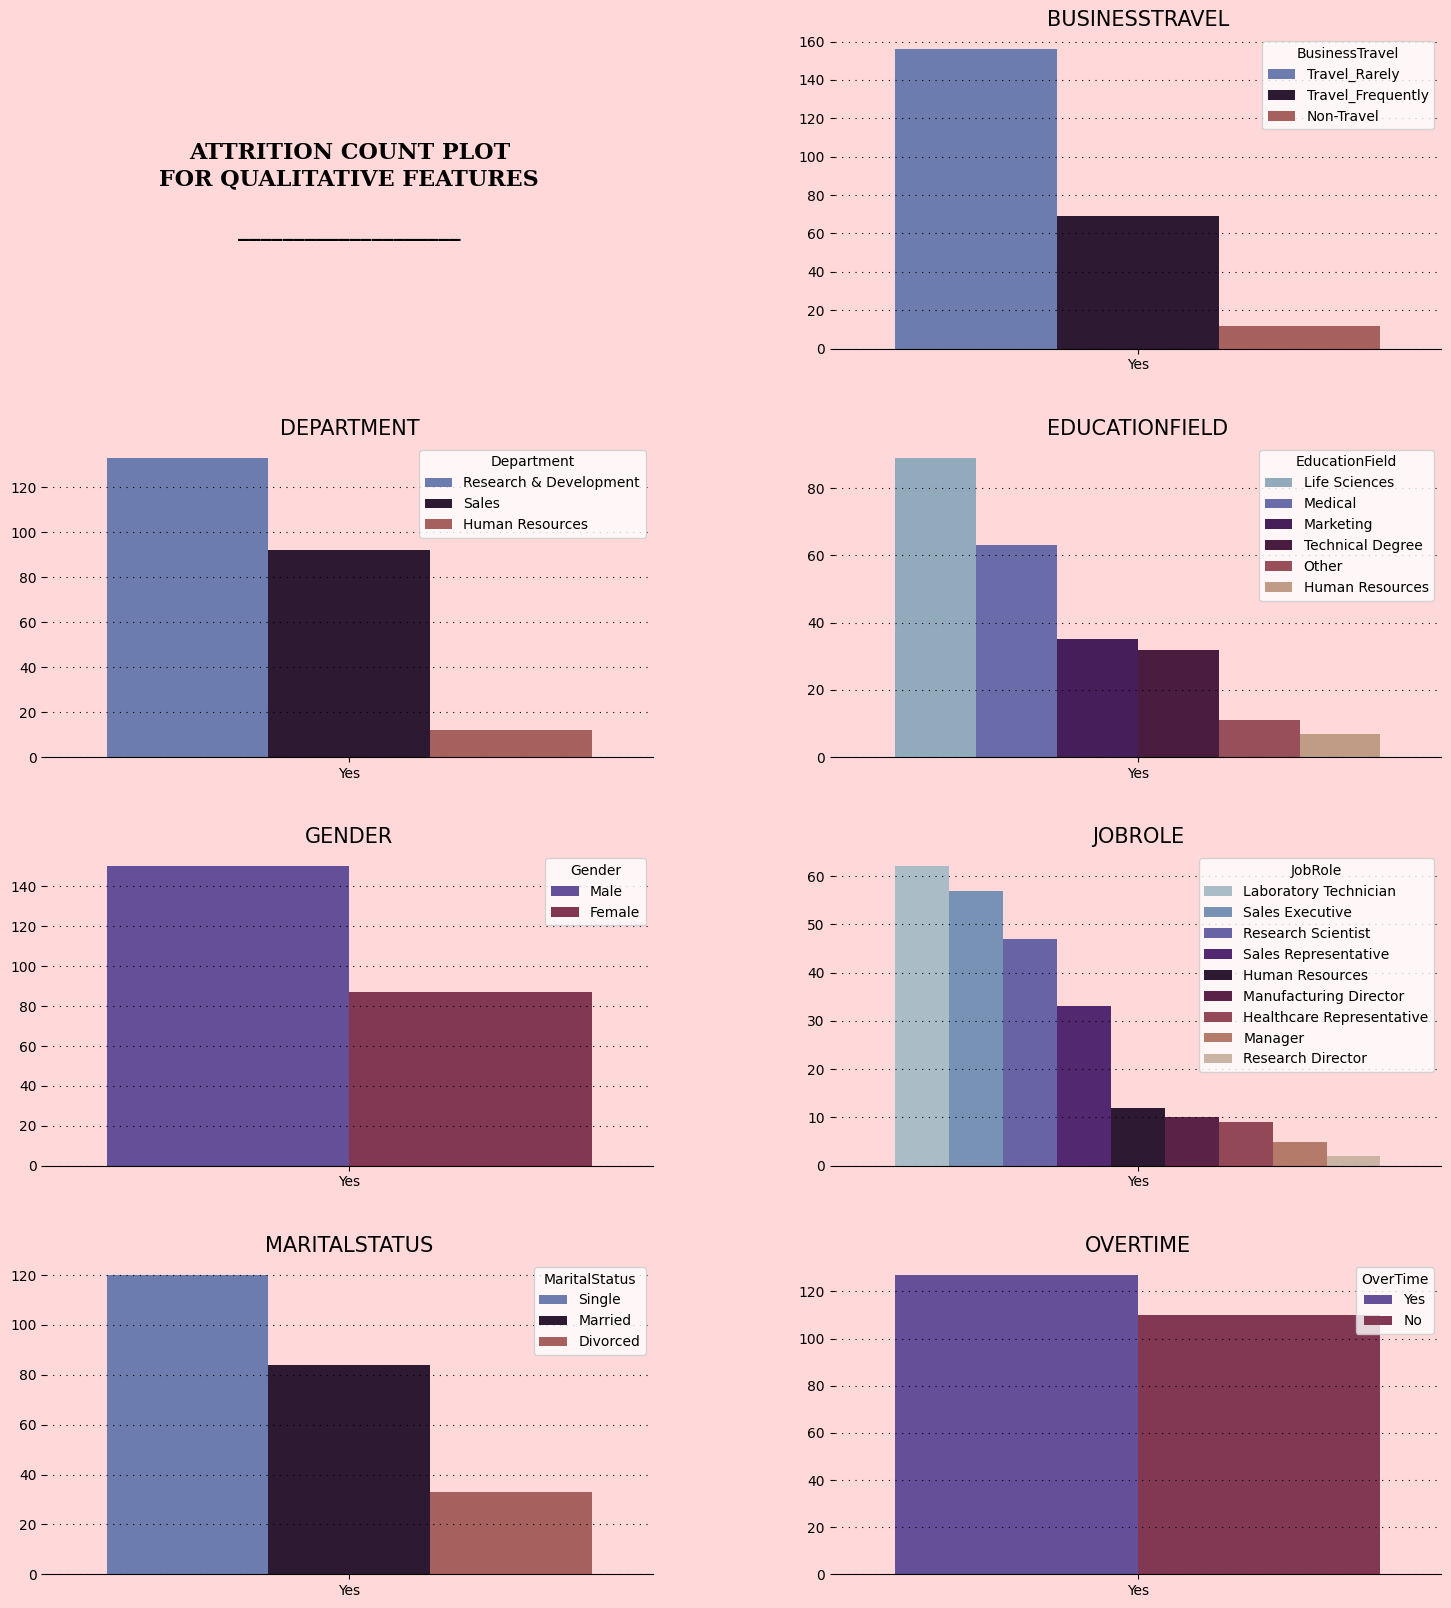

In [ ]:
# Count plot for quantitative features
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[1,0])
sec_4 = plt.subplot(spec[1,1])
sec_5 = plt.subplot(spec[2,0])
sec_6 = plt.subplot(spec[2,1])
sec_7 = plt.subplot(spec[3,0])
sec_8 = plt.subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)

# Plotting graph
axis = [sec_2, sec_3, sec_4, sec_5, sec_6, sec_7,sec_8]
cnt = 0
for feature in data_filtered:
    if data_filtered[feature].dtype=='O' and feature != 'Attrition':
        sns.countplot(data_filtered, x = 'Attrition', hue = feature, ax=axis[cnt],
                      hue_order = data_filtered[feature].value_counts().index, palette='twilight')
        axis[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        axis[cnt].set_xlabel("")
        axis[cnt].set_ylabel("")
        axis[cnt].set_title(feature.upper(), fontsize=15)

        # Removing the spines
        for location in ['top', 'right', 'left']:
            axis[cnt].spines[location].set_visible(False)
        cnt+=1

# Creating plot structure title
sec_1.text(0.5,0.5,'ATTRITION COUNT PLOT\nFOR QUALITATIVE FEATURES\n\n____________________',
           ha='center',va='center',size=16,family='serif',weight=600)

# Removing the axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for location in ['bottom', 'top', 'right', 'left']:
    sec_1.spines[location].set_visible(False)

In [ ]:
# OBSERVATION:

#    1. Employees who are male are most likely to attrite.
#    2. Employees from R&D and sales department are most like to attrite.
#    3. Employees from life science and medical background are most likely to attrite.
#    4. Employees working as laboratory technician,sales executive, reasearch scientist,
#       sales representative are most likely to attrite.
#    5. Employees who are single is most likely to attrite.

#    ** Bivariate analysis as hue has to be done for further insights.

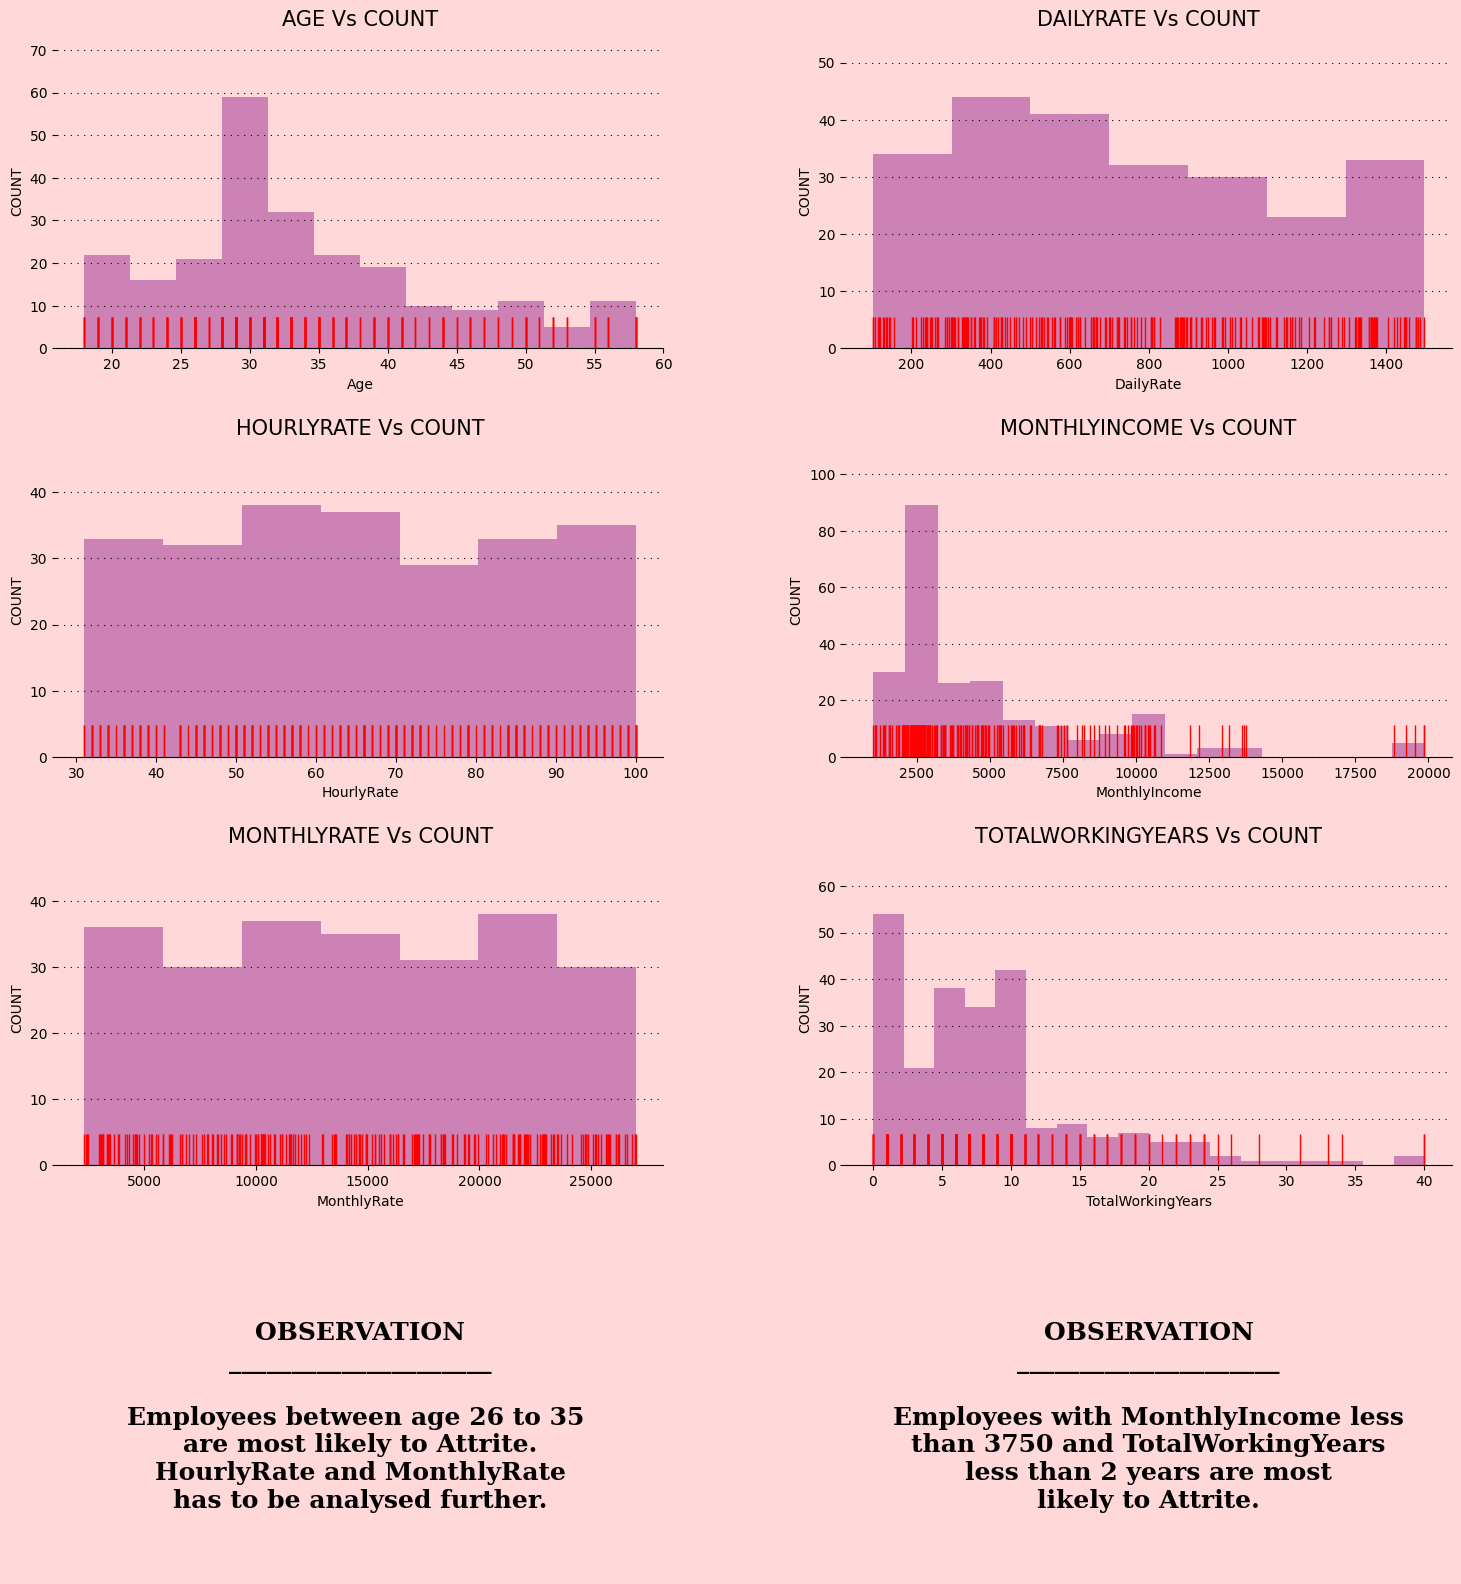

In [ ]:
# ploting for quantitative variable with more than 30 unique values

# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3,hspace=0.3)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])
sec_5 = fig.add_subplot(spec[2,0])
sec_6 = fig.add_subplot(spec[2,1])
sec_7 = fig.add_subplot(spec[3,0])
sec_8 = fig.add_subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_1, sec_2, sec_3, sec_4, sec_5, sec_6]
cnt = 0
for feature in data_filtered:
    if len(data_filtered[feature].unique())>30 and data_filtered[feature].dtype!='O':
        sns.distplot(data_filtered[feature], kde=False, rug = True,
                     rug_kws={'height':0.1, 'color':'red'}, color='purple', ax=sec[cnt])
        sec[cnt].set_ylabel("COUNT")
        sec[cnt].set_title(feature.upper()+' Vs COUNT', fontsize=15)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

        # Removing the spines
        for location in ['top', 'right', 'left']:
            sec[cnt].spines[location].set_visible(False)
        cnt += 1

# Narrating the observations
sec_7.text(0.5,0.5,'OBSERVATION\n_____________________\n\nEmployees between age 26 to 35 \
\nare most likely to Attrite.\nHourlyRate and MonthlyRate\
\nhas to be analysed further.',ha='center',va='center',size=18,family='serif',weight=550)

sec_8.text(0.5,0.5,'OBSERVATION\n_____________________\n\nEmployees with MonthlyIncome less\
\nthan 3750 and TotalWorkingYears\nless than 2 years are most\
\nlikely to Attrite.',ha='center',va='center',size=18,family='serif',weight=550)


# Removing the axis and spines
for location in ['top', 'bottom', 'right', 'left']:
    for section in [sec_7, sec_8]:
        section.spines[location].set_visible(False)
        section.xaxis.set_visible(False)
        section.yaxis.set_visible(False)


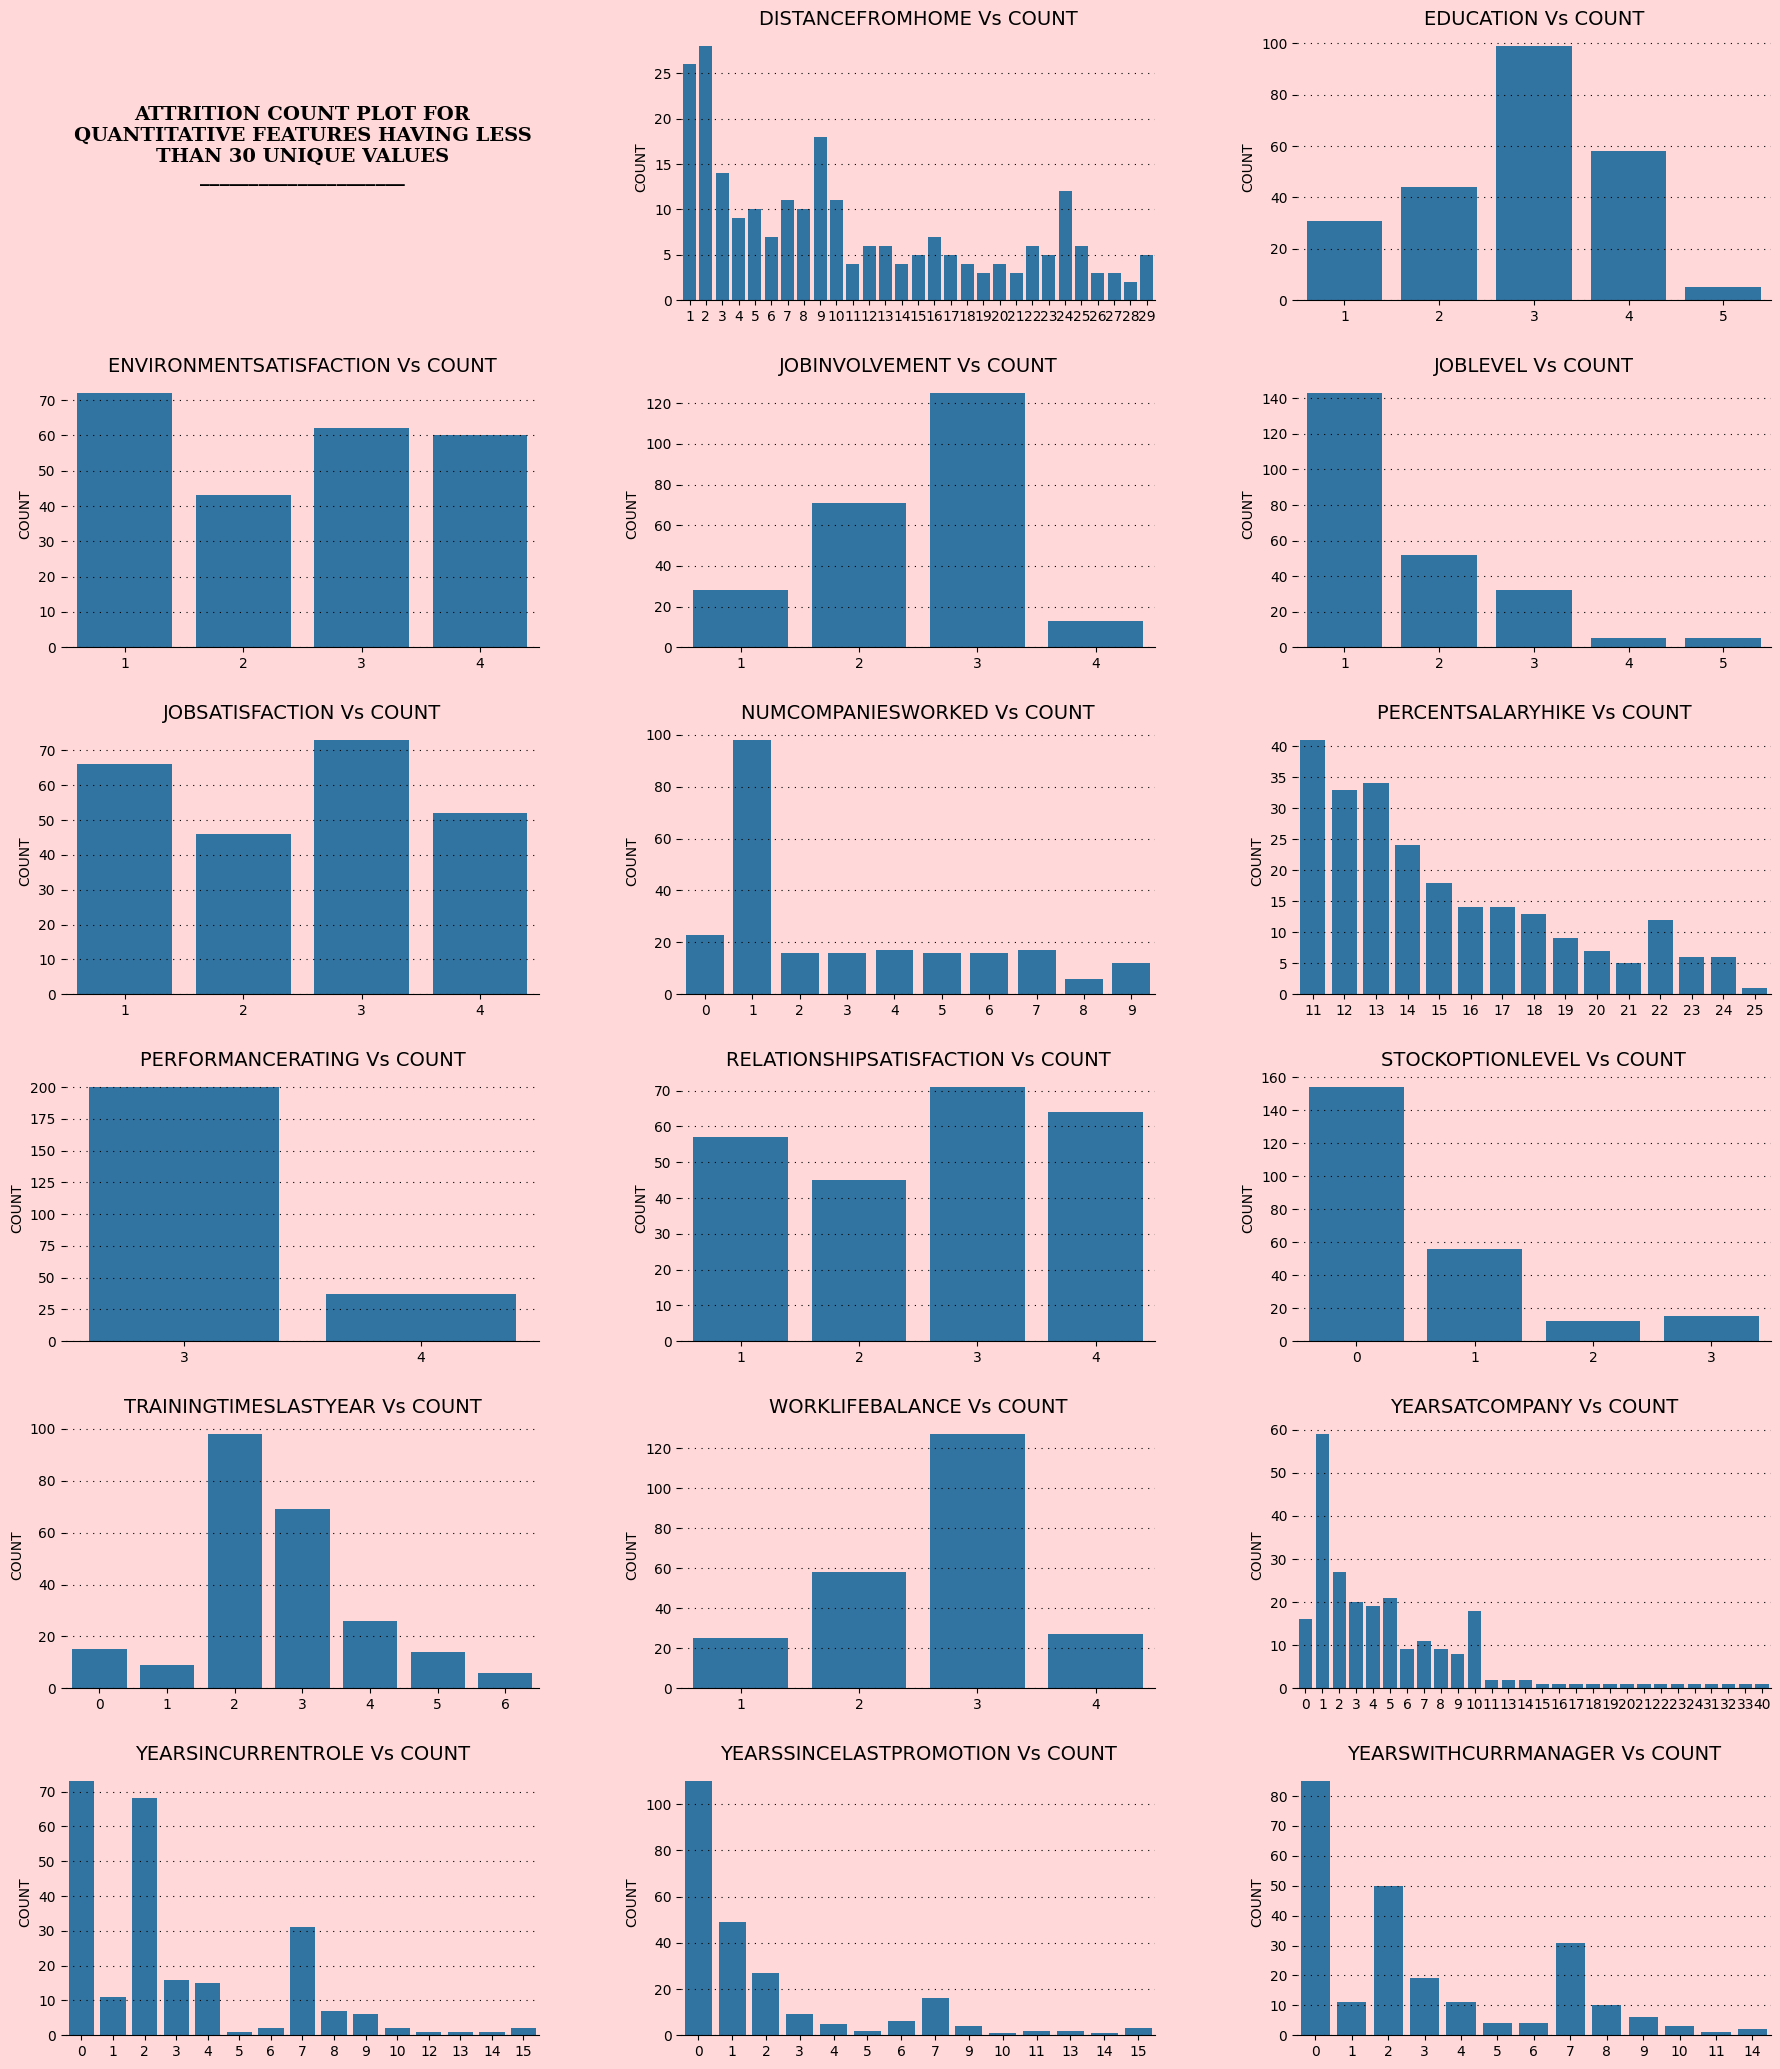

In [ ]:
# ploting for quantitative variable with less than 30 unique values

# Creating plot structure
fig = plt.figure(figsize=(22,26))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.3, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])
sec_08 = fig.add_subplot(spec[2,1])
sec_09 = fig.add_subplot(spec[2,2])
sec_10 = fig.add_subplot(spec[3,0])
sec_11 = fig.add_subplot(spec[3,1])
sec_12 = fig.add_subplot(spec[3,2])
sec_13 = fig.add_subplot(spec[4,0])
sec_14 = fig.add_subplot(spec[4,1])
sec_15 = fig.add_subplot(spec[4,2])
sec_16 = fig.add_subplot(spec[5,0])
sec_17 = fig.add_subplot(spec[5,1])
sec_18 = fig.add_subplot(spec[5,2])


# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,sec_09, sec_10,
       sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18]
cnt = 0
for feature in data_filtered:
    if len(data_filtered[feature].unique())<30 and data_filtered[feature].dtype!='O':
        sns.countplot(x=data_filtered[feature],ax=sec[cnt])
        sec[cnt].set_xlabel(''),
        sec[cnt].set_ylabel('COUNT')
        sec[cnt].set_title(feature.upper()+' Vs COUNT', fontsize=14)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

        for location in ['top', 'right', 'left']:
            sec[cnt].spines[location].set_visible(False)

        cnt += 1

# Creating plot structure title
sec_01.text(0.5,0.5,'ATTRITION COUNT PLOT FOR\nQUANTITATIVE FEATURES HAVING LESS\
\nTHAN 30 UNIQUE VALUES\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing labels and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

In [ ]:
# OBSERVATION FOR QUANTITATIVE FEATURES HAVING LESS THAN 30 UNIQUE VALUES:

# 01. Employees living nearby are more likely to attrite. It has to be further analysed for its controversy.
# 02. Employees with education rank 3 & 4 are most likely to attrite.
# 03. Employees with 3rd rank jobinvolvement are most likely to attrite.
# 04. Employees with joblevel 1 are most likely to attrite.
# 05. Employees who have worked only in one company are most likely to attrite.
# 06. Employees with less than 14% salary hike are most likely to attrite.
# 07. Employees with performance rating of 3 is most likely to attrite.
# 08. Employees with 0 stockoptionlevel is most likely to attrite.
# 09. Employee with 2 and 3 times of trainingtimelastyear is most likely to attrite.
# 10. Employee with rank 3 worklifebalance are most likely to attrite. It has to be analysed for its controversy.
# 11. Employee having 1 year of experience in the company is more likely to attrite.
# 12. Employee serving in same role for 2 years is most likely to attrite.
# 13. Employee serving with 1 and less than 1 year since last promotion is most likely to attrite.
# 14. Employee serving with less than 1 year with current manager are most likely to attrite.
# 15. Environment, job, relationship satisfication is nearly equally spead in all ranks.

### BIVARIATE ANALYSIS

In [ ]:
# JobRole Vs MonthlyIncome
datamean = data_filtered.groupby('JobRole')['MonthlyIncome'].mean().reset_index()
datamean.set_index('JobRole', inplace=True)
datamean.sort_values(by='MonthlyIncome', inplace=True)

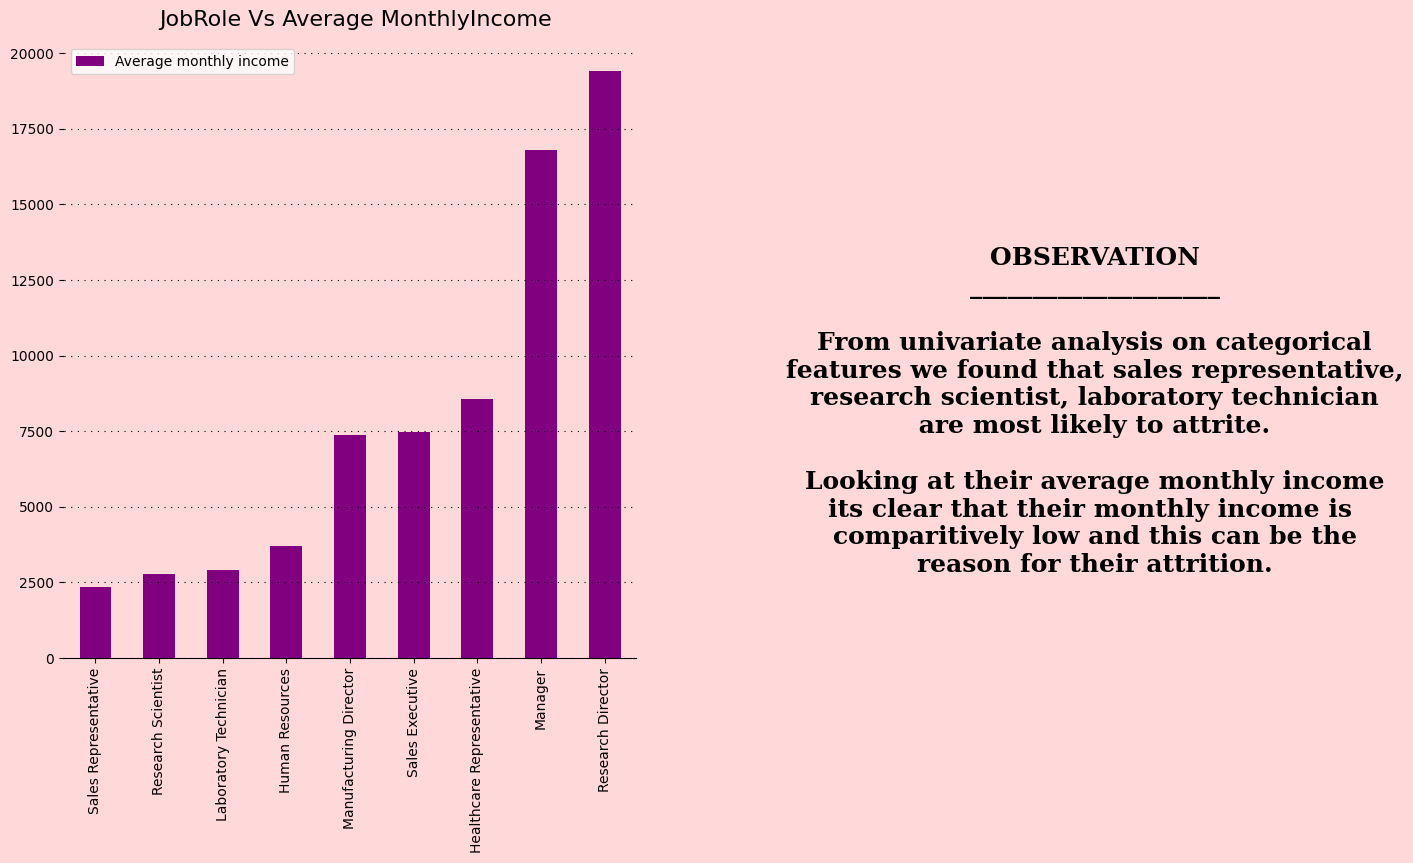

In [ ]:
# Creating plot structure
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# PLotting the graph
datamean.plot.bar(color='purple', ax=sec_1)
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.legend(['Average monthly income'])
sec_1.text(1,20900,'JobRole Vs Average MonthlyIncome', size=16)
sec_1.set_xlabel('')

# Narrating the observation
sec_2.text(0.5,0.4,'OBSERVATION\n____________________\n\nFrom univariate analysis on categorical\
\nfeatures we found that sales representative,\nresearch scientist, laboratory technician\
\n are most likely to attrite. \n\nLooking at their average monthly income\nits clear that their\
 monthly income is \ncomparitively low and this can be the\nreason for their attrition.',
           ha='center', va='center', size=18, family='serif',weight=550)# NArrating the observation

# Removing the labels and spines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top','right','left','bottom']:
    for selection in [sec_1, sec_2]:
        if location == 'bottom' and selection == sec_1:
            continue
        else:
            selection.spines[location].set_visible(False)

In [ ]:
# Analysing Sales Representative for Attrition
SalRep_data = data_filtered[data_filtered['JobRole'] == 'Sales Representative']
SalRep_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,No,23,4,2,0,10,4,3,5,3,0,3
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,4,Male,56,3,2,Sales Representative,4,Married,2086,3335,3,No,14,3,3,1,19,6,4,1,0,0,0
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Yes,14,3,3,0,3,2,3,3,2,0,2
127,19,Yes,Travel_Rarely,528,Sales,22,1,Marketing,4,Male,50,3,1,Sales Representative,3,Single,1675,26820,1,Yes,19,3,4,0,0,2,2,0,0,0,0
171,19,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,3,Female,100,1,1,Sales Representative,1,Single,2325,20989,0,No,21,4,1,0,1,5,4,0,0,0,0


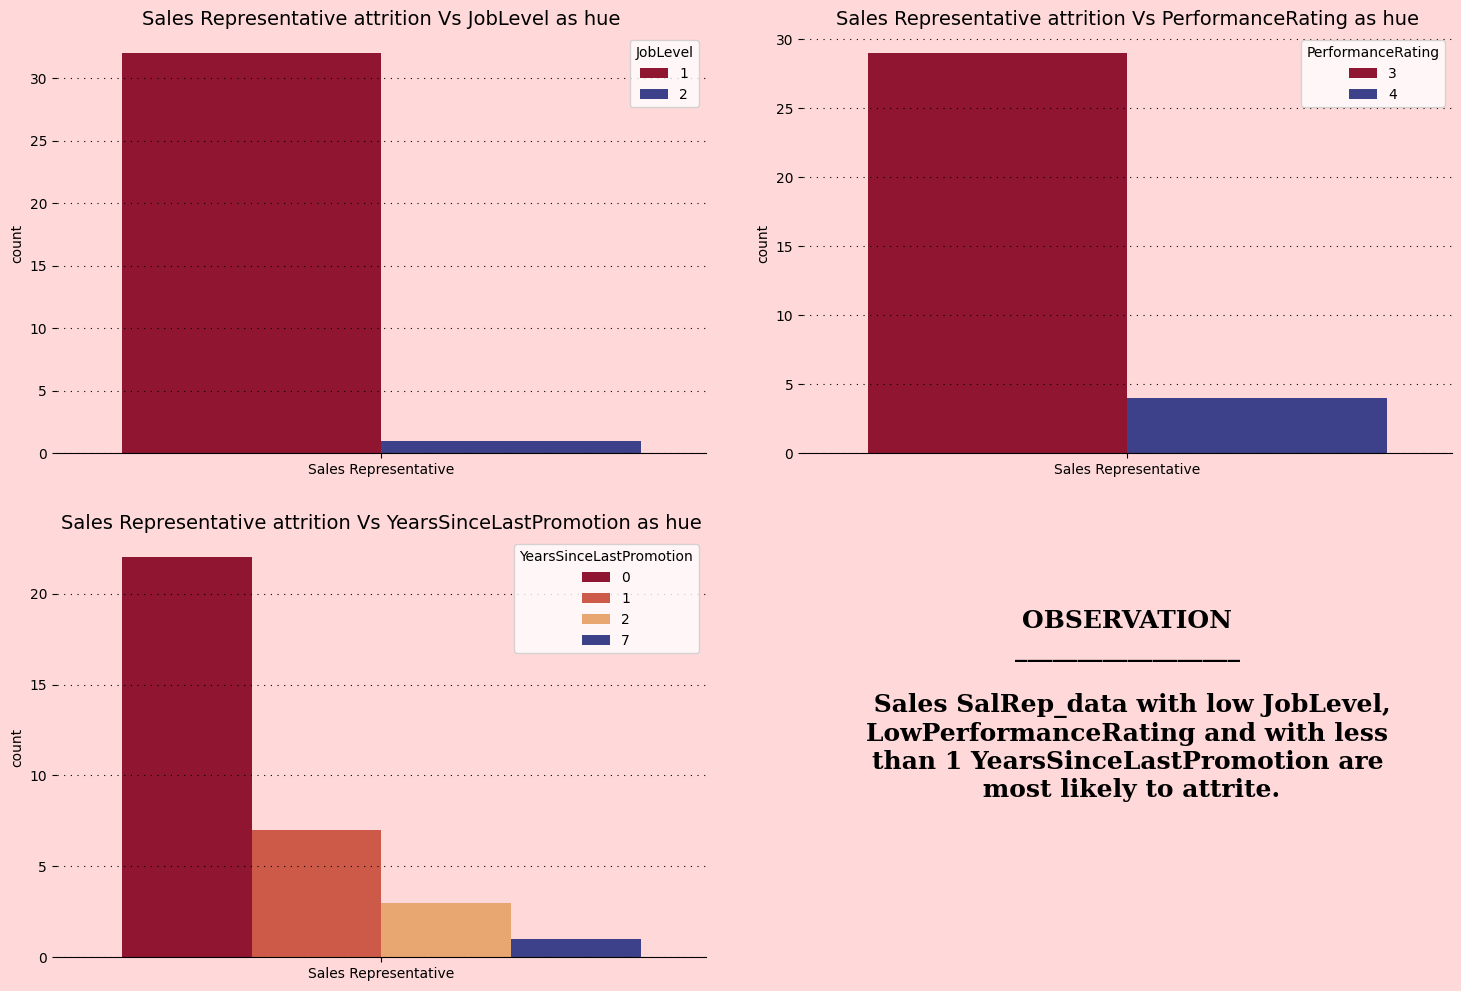

In [ ]:
# Creating plot structure
fig = plt.figure(figsize=(18,12))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])

# Adding color preferences
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_1, sec_2, sec_3, sec_4]
cnt = 0
for hue in ['JobLevel', 'PerformanceRating', 'YearsSinceLastPromotion']:
    sns.countplot(SalRep_data, x='JobRole', hue=hue, ax=sec[cnt], palette='RdYlBu')
    sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sec[cnt].set_title('Sales Representative attrition Vs '+hue+' as hue', size=14)
    sec[cnt].set_xlabel('')
    for location in ['top', 'right', 'left']:
        sec[cnt].spines[location].set_visible(False)
    cnt+=1

# Narrating the observation
sec_4.text(0.5,0.6,'OBSERVATION\n__________________\n\n Sales SalRep_data with low JobLevel,\
\nLowPerformanceRating and with less\
\nthan 1 YearsSinceLastPromotion are\n most likely to attrite.',
           ha='center',va='center',size=18,weight=550,family='serif')

# Removing axis and spines
sec_4.xaxis.set_visible(False)
sec_4.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_4.spines[location].set_visible(False)



In [ ]:
# Attrition based on the numer of companies worked
NumCom_data = data_filtered[data_filtered['YearsAtCompany']==1]
NumCom_data.shape

(59, 31)

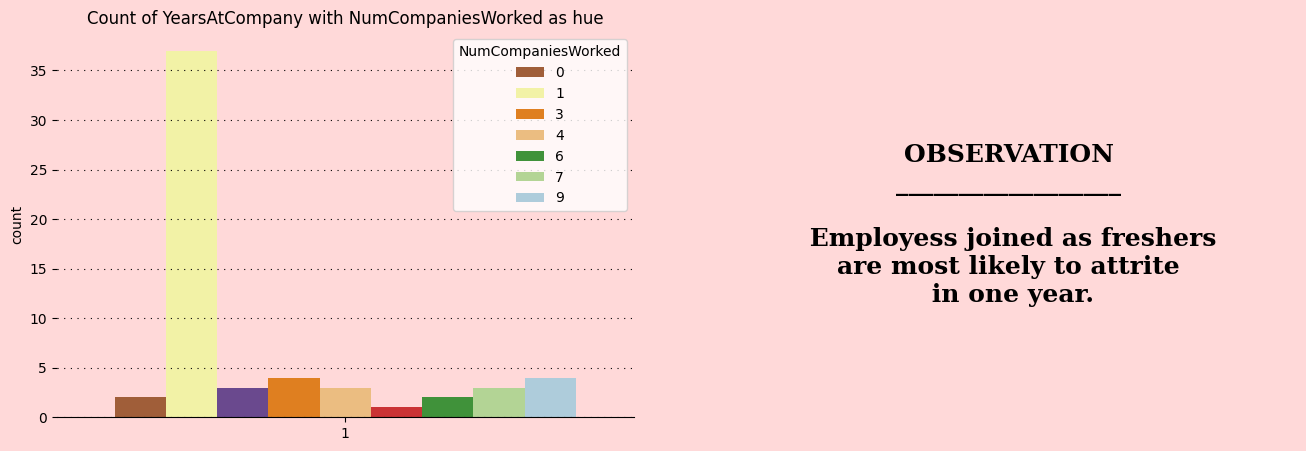

In [ ]:
# Creating plot structure
fig = plt.figure(figsize=(16,5))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preferences
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sns.countplot(NumCom_data , x='YearsAtCompany', hue='NumCompaniesWorked', palette = 'Paired_r', ax=sec_1)
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.set_title('Count of YearsAtCompany with NumCompaniesWorked as hue')
sec_1.set_xlabel('')

# Narrating the observation
sec_2.text(0.5,0.5,'OBSERVATION\n__________________\n\n Employess joined as freshers\
\nare most likely to attrite\n in one year.',
           ha='center',va='center',size=18,weight=550,family='serif')

# Removing the labels and spines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

In [ ]:
# Analysing on attrition based on age

# creating a new column for range of age

condition = [data_filtered['Age'].between(18, 25),
             data_filtered['Age'].between(26, 35),
             data_filtered['Age'].between(36, 45),
             data_filtered['Age'].between(46, 59)]

values = ['18 to 25', '26 to 35', '36 to 45', '46 to 59']

data_filtered['AgeRange'] =np.select(condition, values)

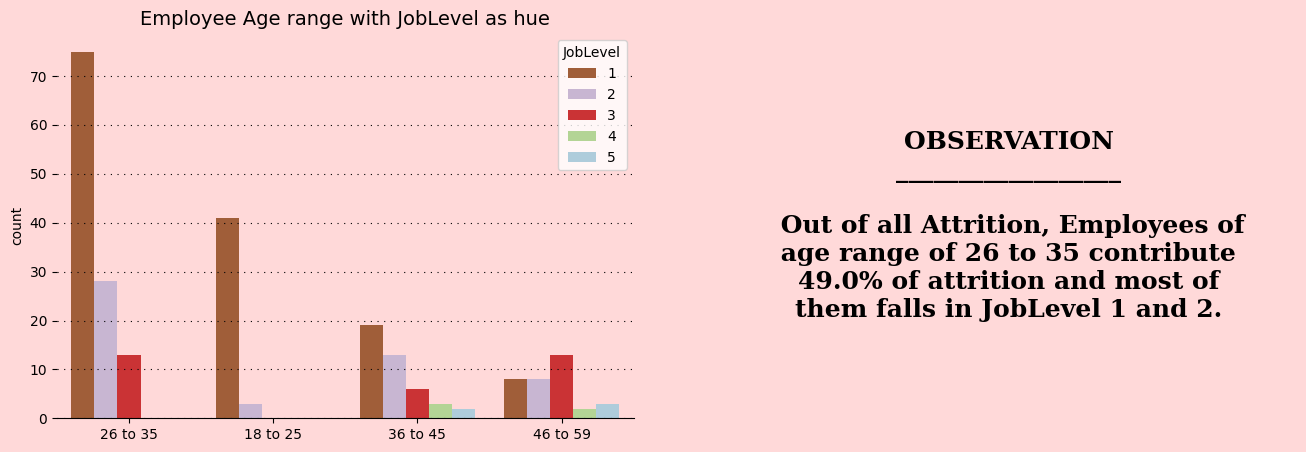

In [ ]:
# Creating plot structure
fig = plt.figure(figsize=(16,5))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sns.countplot(data_filtered, x='AgeRange', hue='JobLevel',
              order = data_filtered['AgeRange'].value_counts().index,
              palette = 'Paired_r', ax=sec_1)
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.set_title('Employee Age range with JobLevel as hue', fontsize=14)
sec_1.set_xlabel('')

# Narrating the observation
drow, dcolumn = data_filtered.shape
ar_cnt = (data_filtered.AgeRange == '26 to 35').sum()
value = np.round((ar_cnt/drow),2)*100
sec_2.text(0.5,0.5,f'OBSERVATION\n__________________\n\n Out of all Attrition, Employees of\
\n age range of 26 to 35 contribute \n{value}% of attrition and most of\nthem falls in JobLevel 1 and 2.',
           ha='center',va='center',size=18,weight=550,family='serif')

# Removing axis and spines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

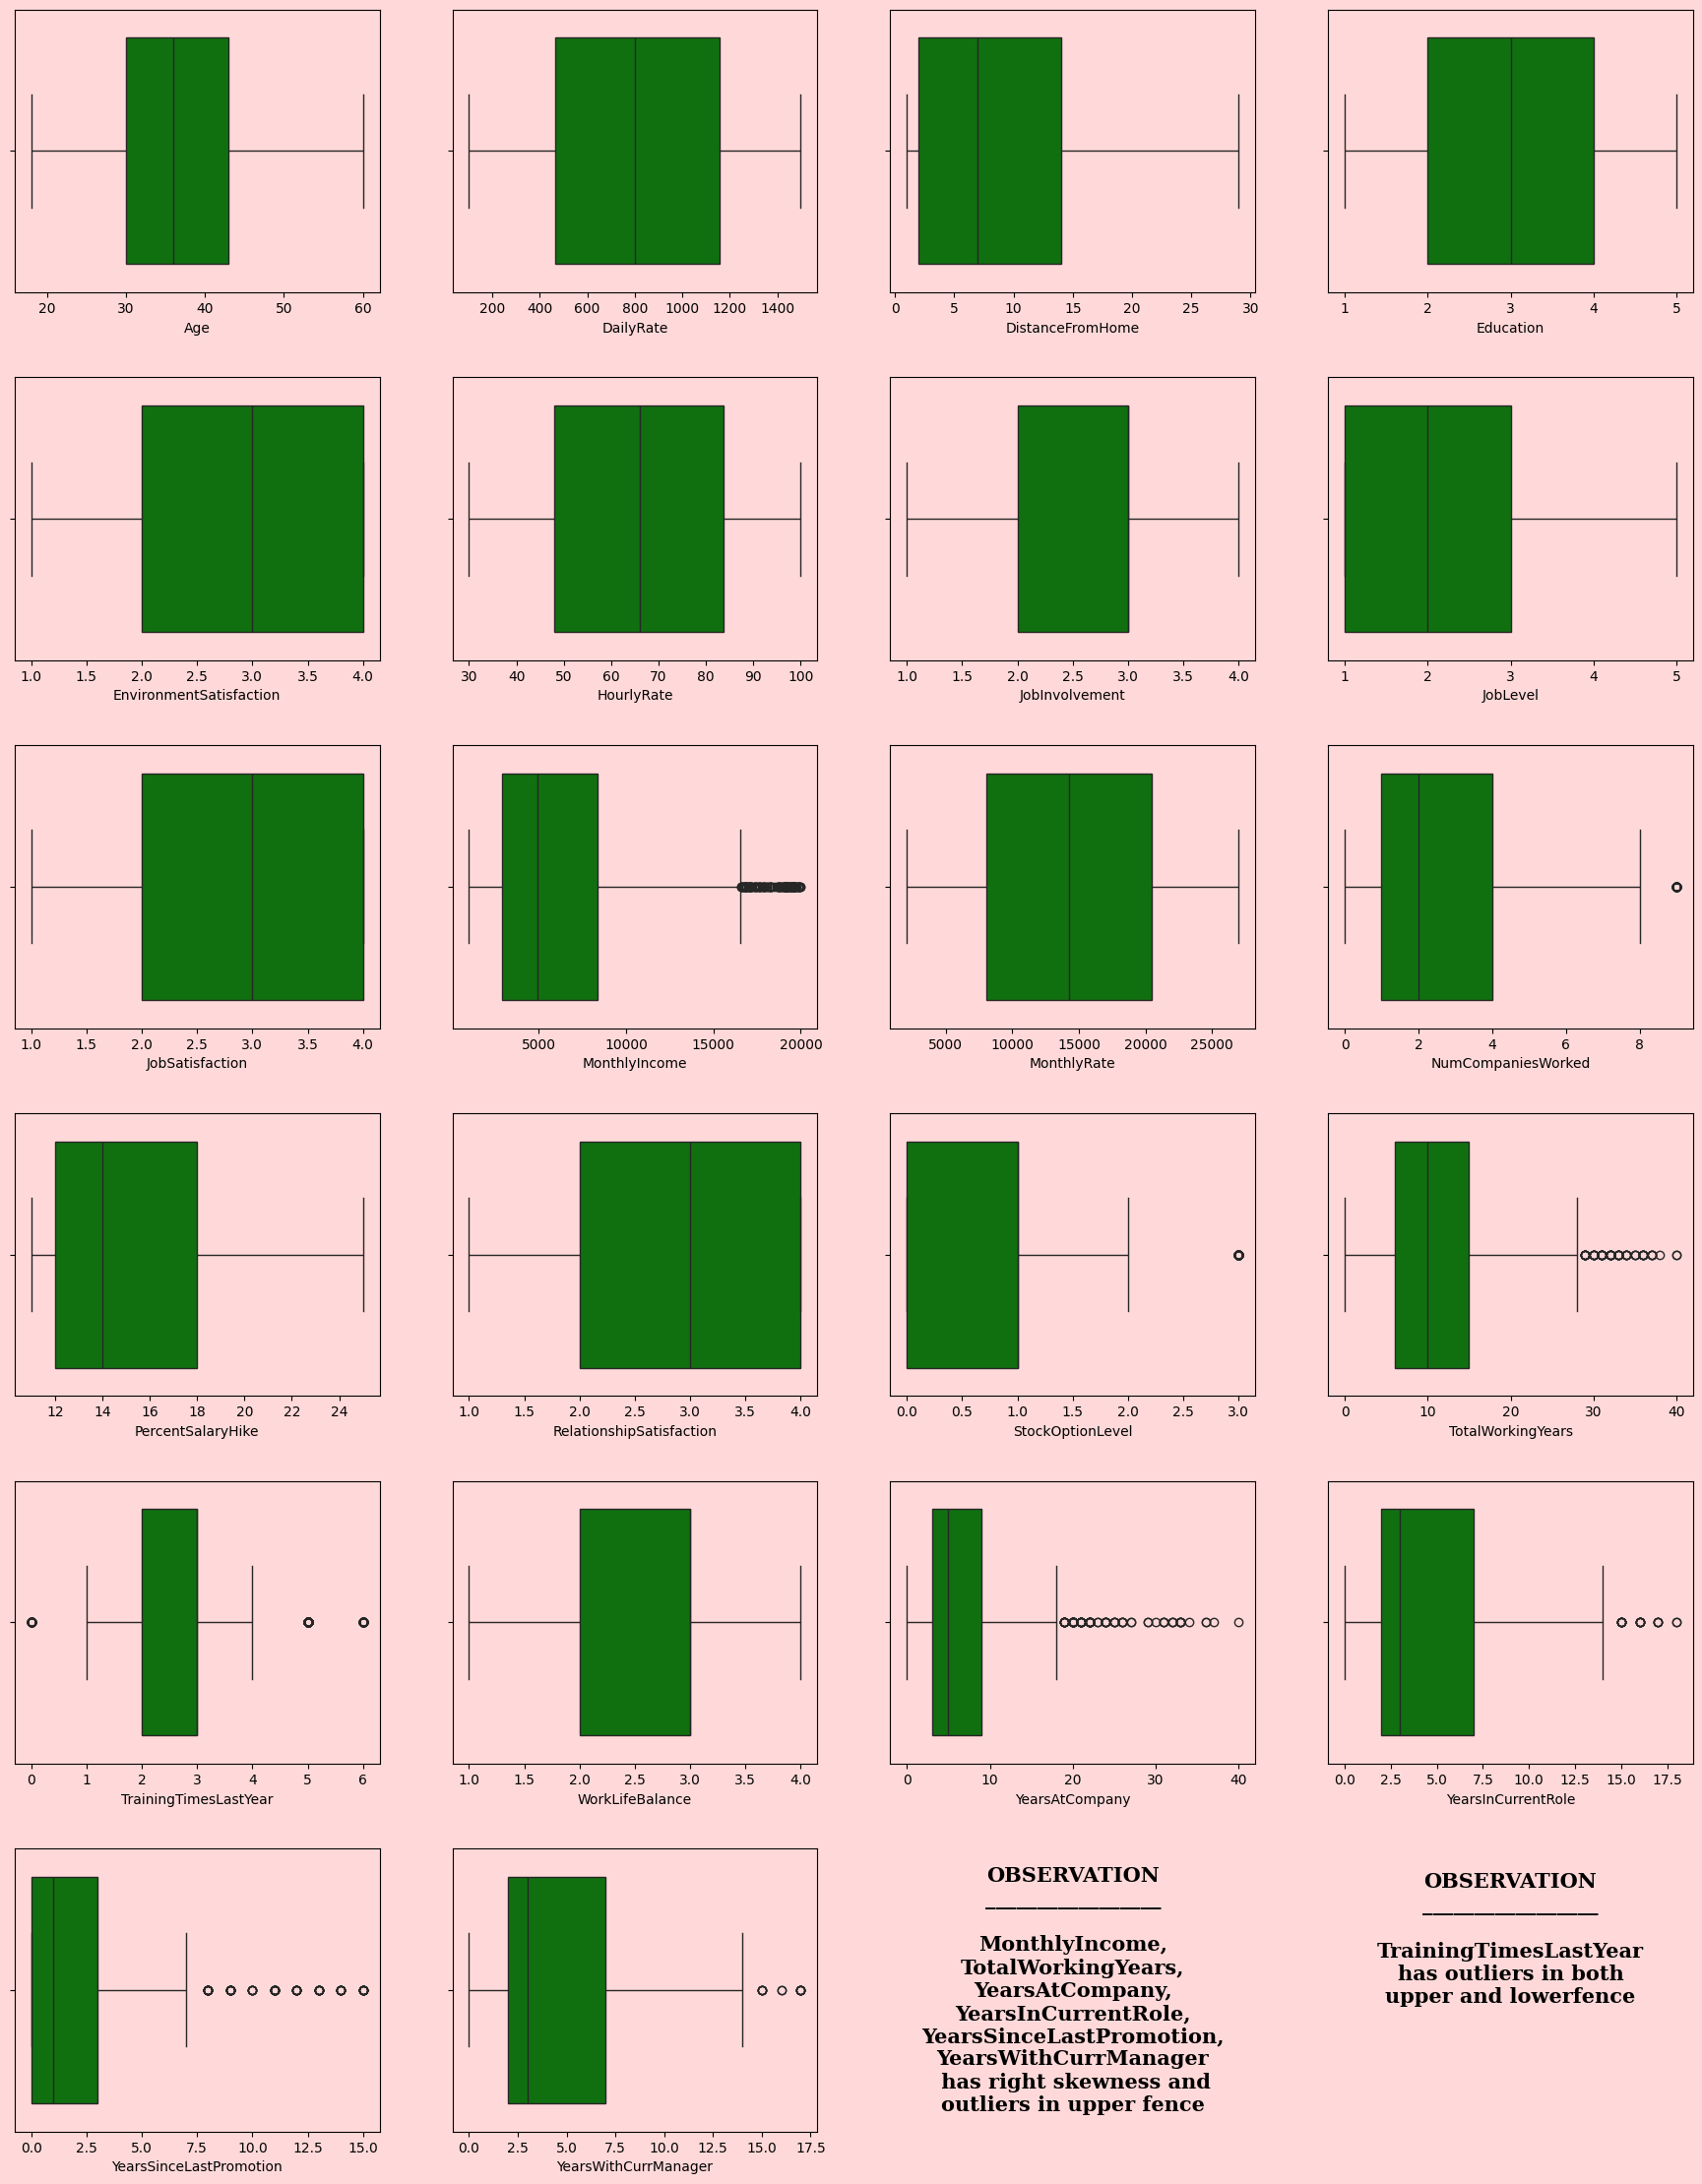

In [ ]:
# Creating subplots
fig = plt.figure(figsize=(22,28))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
                  sec_17, sec_18,sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,
       sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18, sec_19, sec_20, sec_21, sec_22]
cnt = 0
for feature in data.columns:
    if data[feature].dtype != 'O' and len(data[feature].unique())>2:
        sns.boxplot(data[feature], orient='h', ax=sec[cnt], color='green')
        cnt += 1

# Narating the observations
sec_23.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
MonthlyIncome,\nTotalWorkingYears,\nYearsAtCompany,\nYearsInCurrentRole,\
\nYearsSinceLastPromotion,\nYearsWithCurrManager\n has right skewness and\
\noutliers in upper fence',ha='center',va='center', size=15, family='serif', weight=600)

sec_24.text(0.5,0.68,'OBSERVATION\n_________________\n\n\
TrainingTimesLastYear\nhas outliers in both\nupper and lowerfence',
ha='center',va='center', size=15, family='serif', weight=600)

# Removing axis and spines
for sec in [sec_23, sec_24]:
    for location in ['top', 'right', 'bottom','left']:
        sec.spines[location].set_visible(False)
        sec.xaxis.set_visible(False)
        sec.yaxis.set_visible(False)

In [ ]:
# Replacing the outlier with fenced IQR values

for feature in data:
    if data[feature].dtype != 'O' and len(data[feature].unique())>2:

        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile- lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)

        data[feature] = np.where(data[feature]>upper_fence,
                                 upper_fence,
                                 data[feature])

        data[feature] = np.where(data[feature]<lower_fence,
                                 lower_fence,
                                 data[feature])


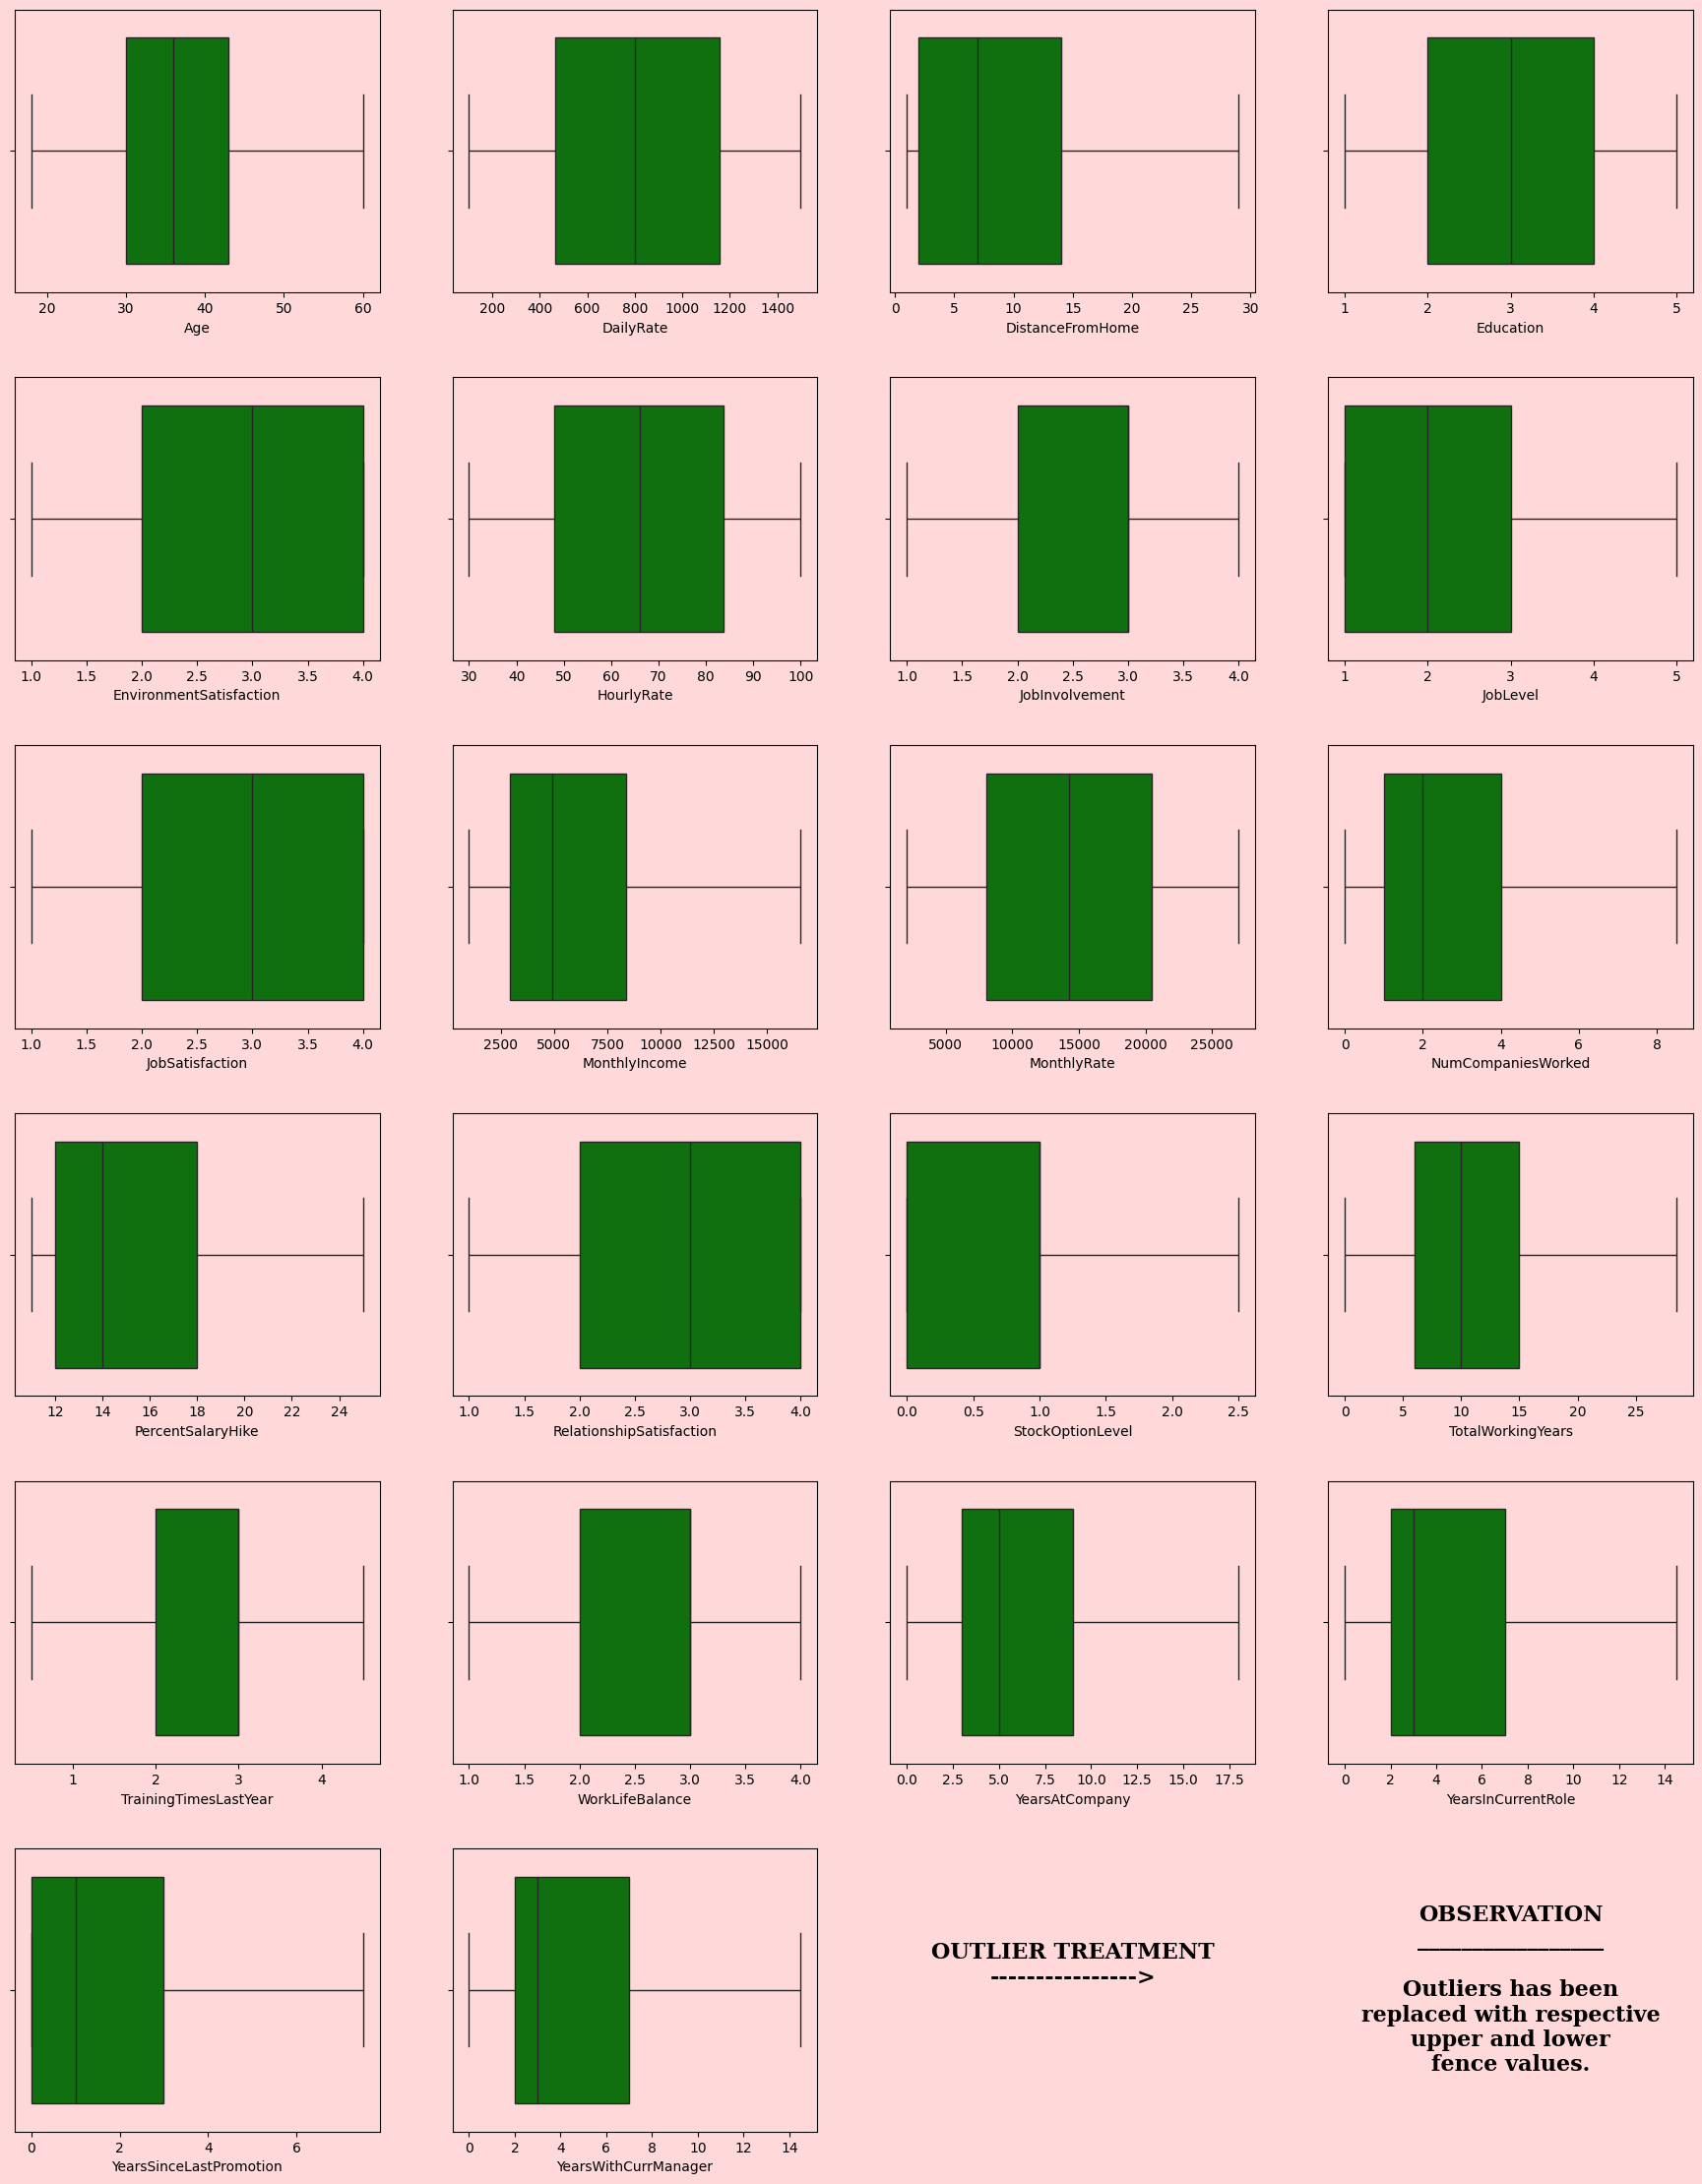

In [ ]:
# Creating subplots
fig = plt.figure(figsize=(22,28))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
                  sec_17, sec_18,sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,
       sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18, sec_19, sec_20, sec_21, sec_22]
cnt = 0
for feature in data:
    if data[feature].dtype!='O' and len(data[feature].unique())>2:
        sns.boxplot(data[feature], orient='h', ax=sec[cnt], color='green')
        cnt+=1

# Narrating the observations
sec_23.text(0.5,0.5,'OUTLIER TREATMENT\n---------------->\n\n',
ha='center',va='center', size=16, family='serif', weight=600)

sec_24.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
Outliers has been\nreplaced with respective\nupper and lower\nfence values.',
ha='center',va='center', size=16, family='serif', weight=600)

# Removing axis and spines
for sec in [sec_23, sec_24]:
    for location in ['top', 'right', 'bottom','left']:
        sec.spines[location].set_visible(False)
        sec.xaxis.set_visible(False)
        sec.yaxis.set_visible(False)